In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

In [2]:
#import the data from USGS which was saved as a CSV
quake = pd.read_csv('earthquake-parsed.csv')
quake['time'] = pd.to_datetime(quake['time'],yearfirst=True)
quake['time'] = quake['time'] - pd.Timedelta(9,'h')
start = pd.Timestamp(2018,11,30,8,20)
quake['time_delta'] = (quake['time'] - start)/pd.Timedelta(1,'h')
quake['mag_rounded'] = round(quake['mag']*2)/2

/Users/rodneymurray/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


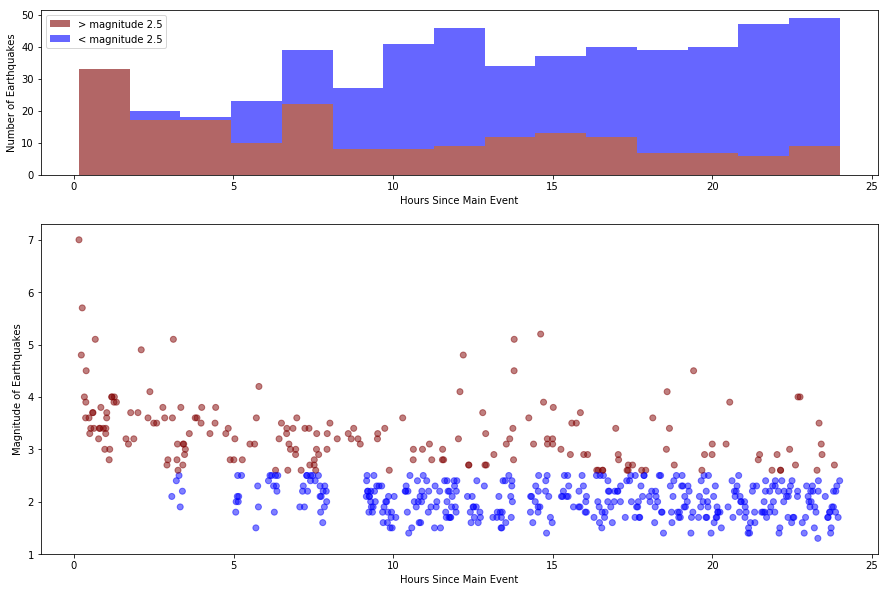

In [3]:
#plot the frequency of large and small aftershocks as a stacked histogram and a scatter plot over time
mag_cutoff = 2.5
quake_plot = quake[quake['time_delta']>0]
quake_plot['color'] = np.where(quake_plot['mag']>mag_cutoff,'maroon','blue')
x = [quake_plot[quake_plot['mag']>mag_cutoff]['time_delta'],quake_plot[quake_plot['mag']<mag_cutoff]['time_delta']]
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,10),gridspec_kw={'height_ratios':[1,2]})
ax1.hist(x,
        bins=15,
        stacked=True,
        label=['> magnitude '+str(mag_cutoff),'< magnitude '+str(mag_cutoff)],
        color=['maroon','blue'],alpha=0.6)
ax1.legend(loc='best')
ax1.set(xlabel='Hours Since Main Event',ylabel='Number of Earthquakes')
ax2.scatter(quake_plot['time_delta'],quake_plot['mag'],color=quake_plot['color'],alpha=0.5)
ax2.set(xlabel='Hours Since Main Event',ylabel='Magnitude of Earthquakes')
# plt.savefig('custom_plot.png',dpi=300)
plt.show()


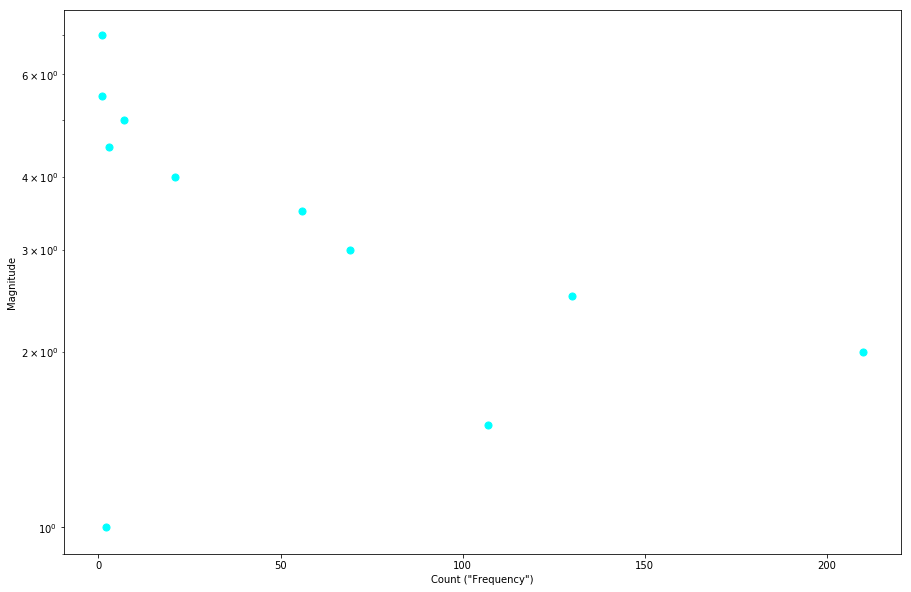

In [4]:
#plot the magnitude on a log scale y-axis vs the frequency on the x-axis
quake_freq = quake.groupby(['mag_rounded'],as_index=False)['mag'].count()
quake_freq['count'] = quake_freq['mag']
plt.clf
plt.figure(figsize=(15,10))
plt.scatter(quake_freq['count'],quake_freq['mag_rounded'],color='cyan',s=50)
plt.yscale('log')
plt.xlabel('Count ("Frequency")',size=10)
plt.ylabel('Magnitude',size=10)
# plt.savefig('plot_2.png')
plt.show()

/Users/rodneymurray/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/rodneymurray/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


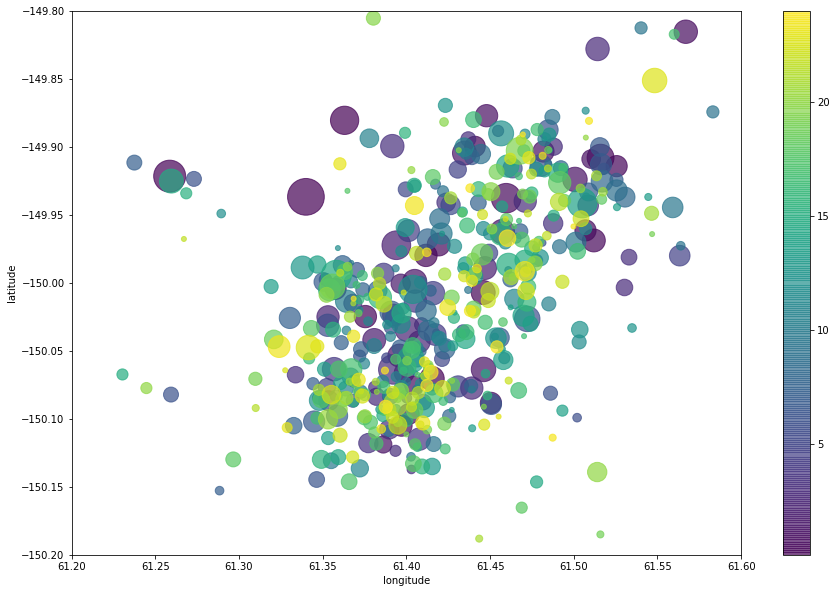

In [5]:
#plot the lat-long over time to understand if a clustering of aftershocks is moving over time
quake_plot.sort_values('time_delta',inplace=True)
plt.figure(figsize=(15,10))
img = plt.scatter(quake_plot['latitude'],quake_plot['longitude'],s=quake_plot['mag']*250-400,c = quake_plot['time_delta'],alpha=0.7)
plt.xlim((61.2,61.6))
plt.ylim((-150.2,-149.8))
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar()
# plt.savefig('location over time.png',dpi=300)
plt.show()